<a href="https://colab.research.google.com/github/ibtihelgharsalah/Advanced-Customer-Segmentation/blob/main/3_ACS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Advanced Customer Segmentation

In [85]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
import pandas as pd
import numpy as np

In [87]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

Remember! K-means clusters data using euclidean distance. Meanwhile, K-modes clusters categorical data based on the number of matching categories between data points. 

A mixture of both of these: the K-prototype algorithm, is just what we need to deal with our mixed-type data!

In [88]:
from kmodes.kprototypes import KPrototypes

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
cd '/content/drive/MyDrive/Colab Notebooks/Datasets'

/content/drive/MyDrive/Colab Notebooks/Datasets


In [91]:
df = pd.read_csv("segmentation.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


So we have 2 numerical features and 5 categorical ones (excluding ID column)

In [92]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

we have no null values!

### Income and Age Data Normalization:

the ranges of Age and Income are very different in our case. So for a better performance of the model, we will apply a normalization technique (min-max scaling) so that each new column has a minimum value of 0 and a maximum value of 1.

In [93]:
#Before scaling/normalization, we keep our initial values in temp variables (since we will use them later)
df_temp = df[['ID','Age','Income']]
df_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [94]:
#Scaling process
scaler = MinMaxScaler()

df['Age'] = scaler.fit_transform(df[['Age']])
df['Income'] = scaler.fit_transform(df[['Income']])

df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,0.844828,2,0.324781,1,2
1,100000002,1,1,0.068966,1,0.420210,1,2
2,100000003,0,0,0.534483,1,0.195144,0,0
3,100000004,0,0,0.465517,1,0.496223,1,1
4,100000005,0,0,0.603448,1,0.413842,1,1


In [95]:
#Removing ID column before moving on to analysis:
df = df.drop(['ID'], axis=1)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


In [96]:
#Converting Age and Income into float :
df['Age'] = df[['Age']].astype(float)
df['Income'] = df[['Income']].astype(float)

In [97]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


### Building our Model :

k-prototypes measures distance between numerical features using Euclidean distance (like K-means) but also measure the distance between categorical features using the number of matching categories (like k-modes).

In [98]:
kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=20)
clusters = kproto.fit_predict(df, categorical=[0, 1, 3, 5, 6])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 738, ncost: 176.61715760551309
Run: 1, iteration: 2/20, moves: 148, ncost: 175.18266517413568
Run: 1, iteration: 3/20, moves: 45, ncost: 175.03340230784664
Run: 1, iteration: 4/20, moves: 51, ncost: 174.71172249715178
Run: 1, iteration: 5/20, moves: 54, ncost: 174.52674645591543
Run: 1, iteration: 6/20, moves: 36, ncost: 174.32644476126262
Run: 1, iteration: 7/20, moves: 31, ncost: 174.19182187019467
Run: 1, iteration: 8/20, moves: 27, ncost: 174.1202377205267
Run: 1, iteration: 9/20, moves: 17, ncost: 174.09894767117774
Run: 1, iteration: 10/20, moves: 3, ncost: 174.09826288701814
Run: 1, iteration: 11/20, moves: 1, ncost: 174.09823861774998
Run: 1, iteration: 12/20, moves: 0, ncost: 174.09823861774998
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 

A centroid is the imaginary or real location representing the center of the cluster. Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.

In [99]:
kproto.cluster_centroids_

array([[0.34751892, 0.34478083, 0.        , 0.        , 1.        ,
        1.        , 2.        ],
       [0.59686168, 0.36013772, 1.        , 1.        , 2.        ,
        1.        , 0.        ],
       [0.1871237 , 0.28955041, 1.        , 1.        , 1.        ,
        1.        , 0.        ],
       [0.33183584, 0.52641808, 0.        , 0.        , 1.        ,
        2.        , 2.        ],
       [0.1683908 , 0.17622743, 1.        , 1.        , 1.        ,
        0.        , 0.        ],
       [0.75801573, 0.45100532, 0.        , 0.        , 2.        ,
        1.        , 1.        ],
       [0.30038314, 0.34859027, 0.        , 0.        , 1.        ,
        1.        , 1.        ],
       [0.31596281, 0.1941496 , 0.        , 0.        , 1.        ,
        0.        , 0.        ],
       [0.16159004, 0.3084304 , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [0.15870548, 0.32312412, 1.        , 1.        , 1.        ,
        1.        , 2. 

In [100]:
len(kproto.cluster_centroids_)

10

In [101]:
cluster_col = []
for c in clusters:
  cluster_col.append(c)
df['cluster'] = cluster_col

In [102]:
#Restore original data from temp variable :
df[['ID','Age','Income']] = df_temp
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
0,0,0,67,2,124670,1,2,5,100000001
1,1,1,22,1,150773,1,2,9,100000002
2,0,0,49,1,89210,0,0,7,100000003
3,0,0,45,1,171565,1,1,6,100000004
4,0,0,53,1,149031,1,1,6,100000005
...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,7,100001996
1996,1,1,27,1,117744,1,0,2,100001997
1997,0,0,31,0,86400,0,0,7,100001998
1998,1,1,24,1,97968,0,0,4,100001999


After clustering, we can now easily get a list of custumors in each cluster :

In [103]:
df[df['cluster']==4].head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
15,1,1,32,1,88428,0,0,4,100000016
47,1,1,23,1,65421,0,0,4,100000048
59,1,1,23,1,115240,0,0,4,100000060
82,1,1,24,1,84792,0,0,4,100000083
92,1,1,33,1,71070,0,0,4,100000093


### Visualization of the segments :

ValueError: ignored

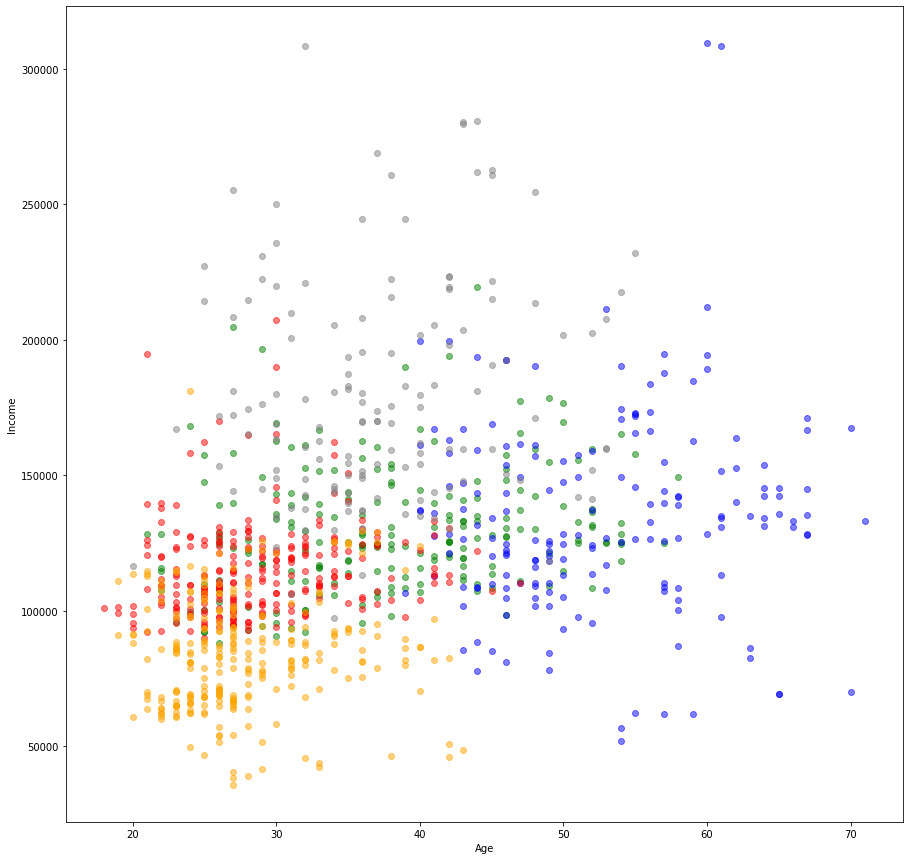

In [104]:
colors = ['green','blue','red','gray','orange','yelow','brown','purple','pink','magenta']
plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

for i, col in zip(range(10), colors):
  df1 = df[df['cluster']==i]
  plt.scatter(df1['Age'], df1['Income'], color=col, alpha=0.5)
plt.legend()
plt.show()